In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("final_dataset.csv")

In [3]:
df.head(10)

,Unnamed: 0,Restaurant,Rating,reviewsCount,street,phone,categoryName,url,Latitude,Longitude
0,0,Haldiram's,4.2,12973,"Haldiram's - Restaurant & Retail Outlet, Plot ...",+91 712 252 2202,Fast food restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1367356,79.060505
1,1,Haldiram's,4.3,12347,"Unit No.60, Ground Floor, Anjuman Complex, Man...",+91 70300 00146,Family restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1635421,79.080170
2,2,Haldiram's Abhinandan,4.1,6920,"City Road, near City Post Office",+91 712 277 9187,Restaurant,https://www.google.com/maps/place/Haldiram's+A...,21.1526584,79.108589
3,3,Reddy's Gokul Brindavan,4.3,6279,"Coffee House Builiding, W High Ct Rd",+91 93731 02496,South Indian restaurant,https://www.google.com/maps/place/Reddy's+Goku...,21.1422,79.061052
4,4,The Chatori Street -Nagpur's 1st outdoor food ...,4.2,6137,"280, Central Bazar Road",+91 96736 14281,Food court,https://www.google.com/maps/place/The+Chatori+...,21.1332186,79.071868
5,5,Gayatri Bhojnalaya,4.3,6079,"W High Ct Rd, Behind Khandelwal Jewellers",+91 77091 09275,Marathi restaurant,https://www.google.com/maps/place/Gayatri+Bhoj...,21.1413035,79.061763
6,6,Checkers Restaurant VCA,4.2,5993,"23/24, VCA Ground, K Naidu Road, near Liberty ...",NaN,Restaurant,https://www.google.com/maps/place/Checkers+Res...,21.1578596,79.076661
7,7,Uttar Dakshin by Naivedhyam,4.3,5942,Mount Rd Ext,+91 93268 81014,South Indian restaurant,https://www.google.com/maps/place/Uttar+Dakshi...,21.1588564,79.079894
8,8,Vishnuji Ki Rasoi,4.1,5807,Central Bazar Road,+91 93703 27557,Marathi restaurant,https://www.google.com/maps/place/Vishnuji+Ki+...,21.1313664,79.065387
9,9,Barbeque Nation - Nagpur - Eternity Mall,4.4,5223,"2nd Floor Eternity Mall, Amravati Rd",+91 80 6902 8737,Barbecue restaurant,https://www.google.com/maps/place/Barbeque+Nat...,21.1429634,79.080415


In [4]:
df.shape

(1996, 10)

In [5]:
df.index

RangeIndex(start=0, stop=1996, step=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'Restaurant', 'Rating', 'reviewsCount', 'street', 'phone',
       'categoryName', 'url', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df=df.drop(['Unnamed: 0','Unnamed: 0'],axis=1)

In [8]:
#df = df.drop_duplicates(subset=['title'])

In [9]:
df.shape

(1996, 9)

In [10]:
#df.head()

In [11]:
#df = df.drop(['state','city','countryCode','website'],axis=1)

In [12]:
#df.columns

In [13]:
#df=df.rename(columns={"title": "Restaurant", "totalScore": "Rating"})

In [14]:
#df.columns

In [15]:
print(df['Rating'].dtype)

float64


In [16]:
df.head(4)

,Restaurant,Rating,reviewsCount,street,phone,categoryName,url,Latitude,Longitude
0,Haldiram's,4.2,12973,"Haldiram's - Restaurant & Retail Outlet, Plot ...",+91 712 252 2202,Fast food restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1367356,79.060505
1,Haldiram's,4.3,12347,"Unit No.60, Ground Floor, Anjuman Complex, Man...",+91 70300 00146,Family restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1635421,79.080170
2,Haldiram's Abhinandan,4.1,6920,"City Road, near City Post Office",+91 712 277 9187,Restaurant,https://www.google.com/maps/place/Haldiram's+A...,21.1526584,79.108589
3,Reddy's Gokul Brindavan,4.3,6279,"Coffee House Builiding, W High Ct Rd",+91 93731 02496,South Indian restaurant,https://www.google.com/maps/place/Reddy's+Goku...,21.1422,79.061052


Arranged the table on the basis of reviewcount and Rating

In [17]:
import numpy as np
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)
df['Rating'] = df['Rating'].astype(float)

In [18]:
print(df['reviewsCount'].dtype)

int64


In [19]:
df = df.sort_values(by=['reviewsCount','Rating'],ascending=False)[:] 

In [20]:
#df.dropna(subset=['street'], inplace=True)

In [21]:
df = df.drop_duplicates(subset=['url'])

In [22]:
#df = df.drop(['website'],axis=1)

In [23]:
df = df.reset_index(drop=True)

In [24]:
df.head(100)

,Restaurant,Rating,reviewsCount,street,phone,categoryName,url,Latitude,Longitude
0,Haldiram's,4.2,12973,"Haldiram's - Restaurant & Retail Outlet, Plot ...",+91 712 252 2202,Fast food restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1367356,79.060505
1,Haldiram's,4.3,12347,"Unit No.60, Ground Floor, Anjuman Complex, Man...",+91 70300 00146,Family restaurant,https://www.google.com/maps/place/Haldiram's/@...,21.1635421,79.080170
2,Haldiram's Abhinandan,4.1,6920,"City Road, near City Post Office",+91 712 277 9187,Restaurant,https://www.google.com/maps/place/Haldiram's+A...,21.1526584,79.108589
3,Reddy's Gokul Brindavan,4.3,6279,"Coffee House Builiding, W High Ct Rd",+91 93731 02496,South Indian restaurant,https://www.google.com/maps/place/Reddy's+Goku...,21.1422,79.061052
4,The Chatori Street -Nagpur's 1st outdoor food ...,4.2,6137,"280, Central Bazar Road",+91 96736 14281,Food court,https://www.google.com/maps/place/The+Chatori+...,21.1332186,79.071868
...,...,...,...,...,...,...,...,...,...
95,Gurpal Foods,3.9,1150,"Plot No 14, Kamptee Road, Opp Tirpude Hospital",+91 93725 96161,Punjabi restaurant,https://www.google.com/maps/place/Gurpal+Foods...,21.1724472,79.100048
96,Villa 167 Cafe,4.3,1146,"Plot No 167, Abhyankar Nagar Rd",+91 78208 83985,Cafe,https://www.google.com/maps/place/Villa+167+Ca...,21.1226156,79.057234
97,Villa 167 Cafe,4.3,1146,"plot no 167 , Villa, 167, Abhyankar Nagar Rd",+91 78208 83985,Cafe,https://www.google.com/maps/place/Villa+167+Ca...,21.1267214,79.057502
98,Cafe Coffee Day,4.0,1141,"Shop no 9,10,11, VCA Stadium Complex, Rabindra...",+91 1800 102 5093,Cafe,https://www.google.com/maps/place/Cafe+Coffee+...,21.1570552,79.077172


In [25]:
#df.to_csv('final_dataset.csv')
#files.download('final_dataset.csv')

In [26]:
df.shape

(1996, 9)

In [27]:
df.columns

Index(['Restaurant', 'Rating', 'reviewsCount', 'street', 'phone',
       'categoryName', 'url', 'Latitude', 'Longitude'],
      dtype='object')

In [28]:
top_restaurant = df.sort_values(['reviewsCount','Rating'],ascending=False) [:20]

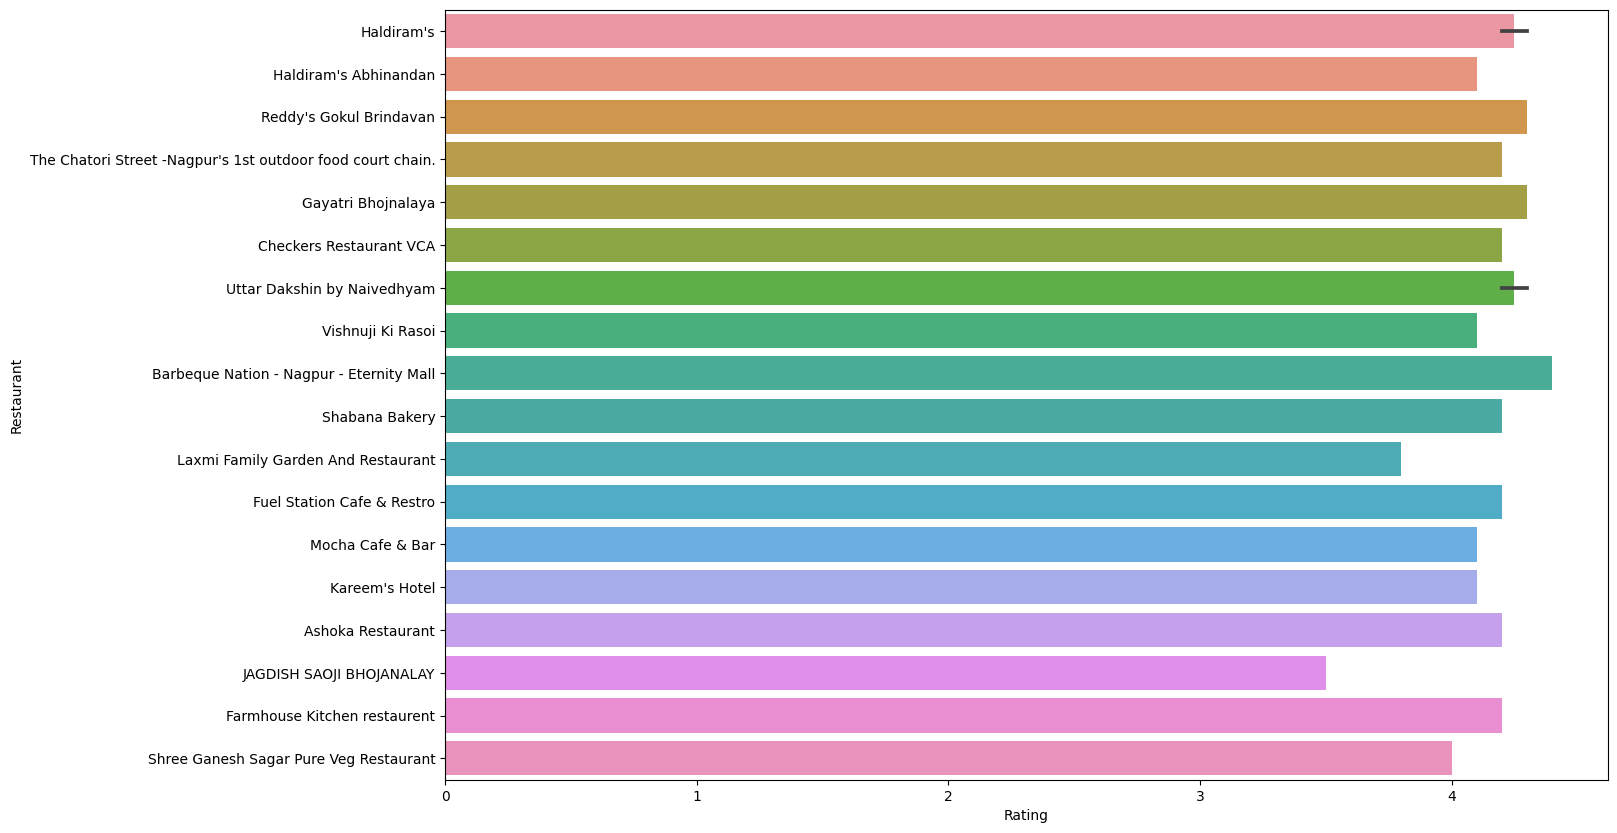

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = 'Rating', y = 'Restaurant', data=top_restaurant, ax= ax);
#plt.savefig('top20 restaurants") 
plt.show()

In [30]:
df.columns

Index(['Restaurant', 'Rating', 'reviewsCount', 'street', 'phone',
       'categoryName', 'url', 'Latitude', 'Longitude'],
      dtype='object')

In [31]:
df = df[df['Latitude'] != '#VALUE!']
df = df[df['Longitude'] != '#VALUE!']
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [32]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hvcmFkaWFwciIsImEiOiJjbGd4bTRxenkwMHZ6M2dwY2xlaGx0d2d3In0.eJlEcLUlBPs28sWFEWMXow") 
#configure_plotly_browser_state() 
px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Rating", size='reviewsCount',
                  size_max=30, zoom=3, width=1200, height=800)

# K-Mean Clusttering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coords = df[['Latitude','Longitude']]
distortions = []
K = range(1, 25)

for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model = kmeans_model.fit(coords)
    distortions.append(kmeans_model.inertia_)

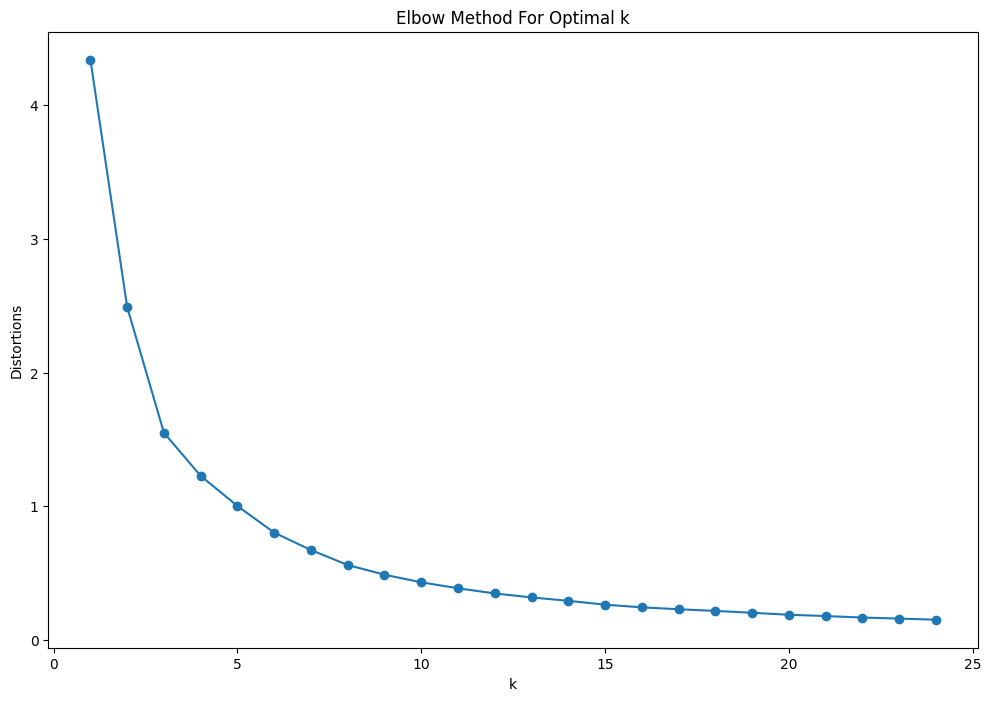

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k') 
#plt.savefig('elbow.png')
plt.show()

# Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clu

for k in range(2, kmax+1):
    kmeans = KMeans (n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [36]:
sil

[0.3814804557216189,
 0.4128995124174254,
 0.3882889108799941,
 0.38822740062228334,
 0.38723137215522163,
 0.39689103248939767,
 0.40414024777862484,
 0.4092506567616482,
 0.4114110741122049,
 0.4120896139859429,
 0.4166236606352693,
 0.4225504902419752,
 0.4336562375185609,
 0.4243729649482038,
 0.4161089891542641,
 0.4348508647212709,
 0.42157989696933645,
 0.4406494560386721,
 0.4258637976997079,
 0.4294802324014802,
 0.4358860725016314,
 0.43388658424983706,
 0.4376142683446594,
 0.4385711800853148,
 0.4384724765390441,
 0.4424368289423316,
 0.439337454744898,
 0.4422581485361621,
 0.43858785501149744,
 0.43884256029419305,
 0.44166353421809,
 0.44800709505580755,
 0.44042121759632913,
 0.4261579709143392,
 0.44187527171240804,
 0.4487850185451057,
 0.44038104223998864,
 0.4430436356061172,
 0.43965987984773686,
 0.43309735995284115,
 0.43122356201053674,
 0.44070333737902234,
 0.4496767478351308,
 0.431101052679158,
 0.43918965702783785,
 0.43700093146156616,
 0.44596698723729455

In [37]:
kmeans = KMeans (n_clusters=7, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 7", "silhouette_score", silhouette_score(coords, y, metric='euclidean'))

k = 7 silhouette_score 0.3970014711205964


c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
df['cluster'] = kmeans.predict(df[[ 'Latitude','Longitude']]) 

In [39]:
px.scatter_mapbox(df,lat="Latitude", lon="Longitude", color="cluster", size='reviewsCount' ,
                  hover_data=['Restaurant','Latitude','Longitude'], zoom=10, width=1200, height=800)

# Location-Based Recommendation

In [40]:
top_restaurnant_nagpur = df.sort_values(by=['reviewsCount','Rating'], ascending=False)


In [41]:
df.columns

Index(['Restaurant', 'Rating', 'reviewsCount', 'street', 'phone',
       'categoryName', 'url', 'Latitude', 'Longitude', 'cluster'],
      dtype='object')

In [42]:

def recommend_restaurants(latitude, longitude):
    user_location = np.array([latitude,longitude]).reshape(1, -1)
    cluster = kmeans.predict(user_location)[0]
    cluster_restaurants = df[df['cluster'] == cluster]
    return df[df["cluster"]==cluster].iloc[0:100][['Restaurant', 'Latitude', 'Longitude','Rating','categoryName','url']];
   

In [43]:
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)


    # Difference between the latitudes and longitudes
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad


    # Haversine formula
    a = math.sin(d_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(d_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Radius of the Earth (in kilometers)
    radius = 6371

    # Calculate the distance
    distance = radius * c
    return distance


In [44]:
category = [
    'Fast food restaurant',
    'Family restaurant',
    'South Indian restaurant',
    'Food court',
    'Marathi restaurant',
    'Barbecue restaurant',
    'Bakery',
    'North Indian restaurant',
    'Indian restaurant',
    'Bar & grill',
    'Mughlai restaurant',
    'Non vegetarian restaurant',
    'Pizza restaurant',
    'Vegetarian restaurant',
    'Rajasthani restaurant',
    'Breakfast restaurant',
    'Italian restaurant',
    'Punjabi restaurant',
    'Candy store',
    'Chicken restaurant',
    'Fine dining restaurant',
    'Biryani restaurant',
    'Sandwich shop',
    'Middle Eastern restaurant',
    'Takeout restaurant',
    'Small plates restaurant',
    'American restaurant',
    'Chinese restaurant',
    'Dhaba',
    'Juice shop',
    'Grill',
    'Shawarma restaurant',
    'Bar',
    'Momo restaurant',
    'Asian restaurant',
    'Buffet restaurant',
    'Bengali restaurant',
    'Country food restaurant',
    'Hyderabadi restaurant',
    'Seafood restaurant',
    'Dessert shop',
    'Health food restaurant',
    'Vegan restaurant',
    'Ice cream shop',
    'Hamburger restaurant',
    'Diner',
    'Seafood donburi restaurant',
    'Gujarati restaurant',
    'Snack bar',
    'Indian takeaway',
    'Fish & chips restaurant',
    'Hoagie restaurant',
    'Cold noodle restaurant',
    'Cape Verdean restaurant',
    'Afghan restaurant',
    'Tiffin center',
    'Continental restaurant',
    'Mandarin restaurant',
    'Chinese noodle restaurant',
    'Fondue restaurant',
    'Sundae restaurant',
    'Fish restaurant',
    'Rice restaurant',
    'Korean restaurant'
]



In [45]:
def recommend(latitude,longitude,distance,user_choice):
    recommended_restaurants=recommend_restaurants(latitude,longitude)
    recommended_restaurants['Distance'] = None

    

    fixed_lat = latitude
    fixed_lon = longitude
    radius = distance
    # List of other coordinates
    for index, row in recommended_restaurants.iterrows():
        restaurant_latitude = row['Latitude']
        restaurant_longitude = row['Longitude']
        distance = calculate_distance(fixed_lat, fixed_lon, restaurant_latitude, restaurant_longitude)
        recommended_restaurants.at[index,'Distance']=distance 
    
    filtered_dist = recommended_restaurants[recommended_restaurants['Distance'] < radius]
    #print(filtered_dist[['Restaurant', 'categoryName','Rating','Distance','url']].head(10))

    user_choice =user_choice
    bychoice = filtered_dist[filtered_dist['categoryName'].str.contains(user_choice, case=False)]
    #print(bychoice)

    bychoice = pd.concat([bychoice, filtered_dist.head(10)])


    

    print("Top 10 Restaurant Near you")
    #new_table = new_table.reset_index(drop=True)
    #new_table.index = new_table.index + 1
    print(bychoice[['Restaurant', 'categoryName','Rating','Distance','url']].head(10))

    return bychoice[['Restaurant', 'categoryName','Rating','Distance','url','Latitude','Longitude']].head(10)





In [46]:
recommend(21.1730198,79.1003504,5,'Fast Food')


Top 10 Restaurant Near you
                        Restaurant          categoryName  Rating  Distance   
111                         Subway  Fast food restaurant     4.0  2.191307  \
181             The Kathi Crossing  Fast food restaurant     4.0  2.185034   
272                 Taj Restaurant  Fast food restaurant     3.7  0.641733   
284                  Bajrang Hotel  Fast food restaurant     4.2  1.313258   
366              Cafe Hide n' seek  Fast food restaurant     4.5  2.316127   
435          Arina cafe and Hotcup  Fast food restaurant     4.6  2.139182   
450           Jay Durga Restaurant  Fast food restaurant     4.0  2.838415   
468  Manmeet Lounge And Restaurant  Fast food restaurant     4.2  2.491699   
643       JFC (Just Fried Chicken)  Fast food restaurant     5.0  4.083714   
677          Maa Sharda Restaurant  Fast food restaurant     4.1  4.582164   

                                                   url  
111  https://www.google.com/maps/place/Subway/@21.1...  


c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Restaurant,categoryName,Rating,Distance,url,Latitude,Longitude
111,Subway,Fast food restaurant,4.0,2.191307,https://www.google.com/maps/place/Subway/@21.1...,21.171427,79.079286
181,The Kathi Crossing,Fast food restaurant,4.0,2.185034,https://www.google.com/maps/place/The+Kathi+Cr...,21.172868,79.079278
272,Taj Restaurant,Fast food restaurant,3.7,0.641733,https://www.google.com/maps/place/Taj+Restaura...,21.174239,79.106400
284,Bajrang Hotel,Fast food restaurant,4.2,1.313258,https://www.google.com/maps/place/Bajrang+Hote...,21.179751,79.089943
366,Cafe Hide n' seek,Fast food restaurant,4.5,2.316127,https://www.google.com/maps/place/Cafe+Hide+n'...,21.167998,79.078672
435,Arina cafe and Hotcup,Fast food restaurant,4.6,2.139182,https://www.google.com/maps/place/Arina+cafe+a...,21.190561,79.091878
450,Jay Durga Restaurant,Fast food restaurant,4.0,2.838415,https://www.google.com/maps/place/Jay+Durga+Re...,21.188636,79.078695
468,Manmeet Lounge And Restaurant,Fast food restaurant,4.2,2.491699,https://www.google.com/maps/place/Manmeet+Loun...,21.195423,79.099838
643,JFC (Just Fried Chicken),Fast food restaurant,5.0,4.083714,https://www.google.com/maps/place/JFC+(Just+Fr...,21.181115,79.061934
677,Maa Sharda Restaurant,Fast food restaurant,4.1,4.582164,https://www.google.com/maps/place/Maa+Sharda+R...,21.208009,79.077003


In [47]:
recommend(21.1750198,79.1203504,5,'Cafe')

Top 10 Restaurant Near you
                   Restaurant categoryName  Rating  Distance   
575             MAD CASA Cafe         Cafe     4.6  4.029173  \
747                Aroma Cafe         Cafe     4.3  1.550902   
955          Light house Cafe         Cafe     4.6  4.125222   
961             Makhan Mishri         Cafe     4.3  3.601308   
1012           Delicioso cafe         Cafe     4.9  0.551067   
1116              Plan B Cafe         Cafe     3.5  1.626437   
1298            Triple 2 cafe         Cafe     5.0  1.488534   
1299          MOWGLI TEA CAFE         Cafe     5.0   0.34213   
1409  The Cafe - Taste Dil Se         Cafe     5.0  1.722731   
1415             Smoking Zone         Cafe     5.0  3.010181   

                                                    url  
575   https://www.google.com/maps/place/MAD+CASA+Caf...  
747   https://www.google.com/maps/place/Aroma+Cafe/@...  
955   https://www.google.com/maps/place/Light+house+...  
961   https://www.google.com/maps/pl

c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Restaurant,categoryName,Rating,Distance,url,Latitude,Longitude
575,MAD CASA Cafe,Cafe,4.6,4.029173,https://www.google.com/maps/place/MAD+CASA+Caf...,21.148174,79.146448
747,Aroma Cafe,Cafe,4.3,1.550902,https://www.google.com/maps/place/Aroma+Cafe/@...,21.162660,79.113420
955,Light house Cafe,Cafe,4.6,4.125222,https://www.google.com/maps/place/Light+house+...,21.147940,79.147542
961,Makhan Mishri,Cafe,4.3,3.601308,https://www.google.com/maps/place/Makhan+Mishr...,21.152110,79.144899
1012,Delicioso cafe,Cafe,4.9,0.551067,https://www.google.com/maps/place/Delicioso+ca...,21.171609,79.124206
1116,Plan B Cafe,Cafe,3.5,1.626437,https://www.google.com/maps/place/Plan+B+Cafe/...,21.165633,79.108321
1298,Triple 2 cafe,Cafe,5.0,1.488534,https://www.google.com/maps/place/Triple+2+caf...,21.163160,79.113692
1299,MOWGLI TEA CAFE,Cafe,5.0,0.34213,https://www.google.com/maps/place/MOWGLI+TEA+C...,21.172951,79.117908
1409,The Cafe - Taste Dil Se,Cafe,5.0,1.722731,https://www.google.com/maps/place/The+Cafe+-+T...,21.190435,79.118694
1415,Smoking Zone,Cafe,5.0,3.010181,https://www.google.com/maps/place/Smoking+Zone...,21.180981,79.148670


In [48]:
recommend(21.120712,78.9900825,10,'Vegetarian')


Top 10 Restaurant Near you
                      Restaurant           categoryName  Rating  Distance   
24      Shree Gayatri Bhojanalay  Vegetarian restaurant     4.2  6.921823  \
91        Renu Restaurant & Mess  Vegetarian restaurant     4.2  4.406753   
201         Raghuveer Restaurant  Vegetarian restaurant     3.8  2.703164   
205                    Baba Cafe  Vegetarian restaurant     4.0  6.035452   
254             UFO Fries & Corn  Vegetarian restaurant     4.3  7.169761   
499         R.D. Mess & Caterers  Vegetarian restaurant     4.3  5.999624   
12   Uttar Dakshin by Naivedhyam      Indian restaurant     4.2  6.929156   
21            Haldiram's Express             Restaurant     4.2  2.954707   
24      Shree Gayatri Bhojanalay  Vegetarian restaurant     4.2  6.921823   
29           The Breakfast Story   Breakfast restaurant     4.3  5.041003   

                                                   url  
24   https://www.google.com/maps/place/Shree+Gayatr...  
91   https:

c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Restaurant,categoryName,Rating,Distance,url,Latitude,Longitude
24,Shree Gayatri Bhojanalay,Vegetarian restaurant,4.2,6.921823,https://www.google.com/maps/place/Shree+Gayatr...,21.115710,79.056598
91,Renu Restaurant & Mess,Vegetarian restaurant,4.2,4.406753,https://www.google.com/maps/place/Renu+Restaur...,21.118548,79.032504
201,Raghuveer Restaurant,Vegetarian restaurant,3.8,2.703164,https://www.google.com/maps/place/Raghuveer+Re...,21.117875,79.015965
205,Baba Cafe,Vegetarian restaurant,4.0,6.035452,https://www.google.com/maps/place/Baba+Cafe/@2...,21.121414,79.048265
254,UFO Fries & Corn,Vegetarian restaurant,4.3,7.169761,https://www.google.com/maps/place/UFO+Fries+%2...,21.128867,79.058652
499,R.D. Mess & Caterers,Vegetarian restaurant,4.3,5.999624,https://www.google.com/maps/place/R.D.+Mess+%2...,21.110086,79.046789
12,Uttar Dakshin by Naivedhyam,Indian restaurant,4.2,6.929156,https://www.google.com/maps/place/Uttar+Dakshi...,21.118503,79.056843
21,Haldiram's Express,Restaurant,4.2,2.954707,https://www.google.com/maps/place/Haldiram's+E...,21.118519,79.018471
24,Shree Gayatri Bhojanalay,Vegetarian restaurant,4.2,6.921823,https://www.google.com/maps/place/Shree+Gayatr...,21.115710,79.056598
29,The Breakfast Story,Breakfast restaurant,4.3,5.041003,https://www.google.com/maps/place/The+Breakfas...,21.123289,79.038604


In [49]:
recommend(21.120712,78.9900825,7,'Pizza')

Top 10 Restaurant Near you
                      Restaurant           categoryName  Rating  Distance   
50                Domino's Pizza       Pizza restaurant     4.1  2.953307  \
301                 UNLTD PizzaZ       Pizza restaurant     3.7  6.203194   
12   Uttar Dakshin by Naivedhyam      Indian restaurant     4.2  6.929156   
21            Haldiram's Express             Restaurant     4.2  2.954707   
24      Shree Gayatri Bhojanalay  Vegetarian restaurant     4.2  6.921823   
29           The Breakfast Story   Breakfast restaurant     4.3  5.041003   
44                  Dahiya Momos   Fast food restaurant     4.3  5.635075   
50                Domino's Pizza       Pizza restaurant     4.1  2.953307   
56      SHANKAR SAOJI RESTAURANT             Restaurant     4.2  5.235572   
64                      Cluckers     Chicken restaurant     4.3  6.905335   

                                                   url  
50   https://www.google.com/maps/place/Domino's+Piz...  
301  https:

c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Restaurant,categoryName,Rating,Distance,url,Latitude,Longitude
50,Domino's Pizza,Pizza restaurant,4.1,2.953307,https://www.google.com/maps/place/Domino's+Piz...,21.118559,79.018461
301,UNLTD PizzaZ,Pizza restaurant,3.7,6.203194,https://www.google.com/maps/place/UNLTD+PizzaZ...,21.130915,79.048880
12,Uttar Dakshin by Naivedhyam,Indian restaurant,4.2,6.929156,https://www.google.com/maps/place/Uttar+Dakshi...,21.118503,79.056843
21,Haldiram's Express,Restaurant,4.2,2.954707,https://www.google.com/maps/place/Haldiram's+E...,21.118519,79.018471
24,Shree Gayatri Bhojanalay,Vegetarian restaurant,4.2,6.921823,https://www.google.com/maps/place/Shree+Gayatr...,21.115710,79.056598
29,The Breakfast Story,Breakfast restaurant,4.3,5.041003,https://www.google.com/maps/place/The+Breakfas...,21.123289,79.038604
44,Dahiya Momos,Fast food restaurant,4.3,5.635075,https://www.google.com/maps/place/Dahiya+Momos...,21.114009,79.043931
50,Domino's Pizza,Pizza restaurant,4.1,2.953307,https://www.google.com/maps/place/Domino's+Piz...,21.118559,79.018461
56,SHANKAR SAOJI RESTAURANT,Restaurant,4.2,5.235572,https://www.google.com/maps/place/SHANKAR+SAOJ...,21.111290,79.039535
64,Cluckers,Chicken restaurant,4.3,6.905335,https://www.google.com/maps/place/Cluckers/@21...,21.122222,79.056636


In [50]:
final = recommend(21.1530569,79.0764441,5,'Pizza')
final
px.scatter_mapbox(final, lat="Latitude", lon="Longitude", color="Rating",
                  size_max=30, zoom=3, width=1200, height=800)

c:\Users\RITESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



Top 10 Restaurant Near you
                                            Restaurant   
118                                          Pizza Hut  \
141                        ZINQ - Kitchen. Bar. Bistro   
172                                     Domino's Pizza   
0                                           Haldiram's   
1                                           Haldiram's   
3                              Reddy's Gokul Brindavan   
4    The Chatori Street -Nagpur's 1st outdoor food ...   
5                                   Gayatri Bhojnalaya   
6                              Checkers Restaurant VCA   
7                          Uttar Dakshin by Naivedhyam   

                categoryName  Rating  Distance   
118         Pizza restaurant     4.1  1.162709  \
141         Pizza restaurant     4.0  0.797125   
172         Pizza restaurant     4.1  1.866811   
0       Fast food restaurant     4.2  2.454846   
1          Family restaurant     4.3  1.228254   
3    South Indian restaurant     4

In [51]:
final

,Restaurant,categoryName,Rating,Distance,url,Latitude,Longitude
118,Pizza Hut,Pizza restaurant,4.1,1.162709,https://www.google.com/maps/place/Pizza+Hut/@2...,21.143288,79.080444
141,ZINQ - Kitchen. Bar. Bistro,Pizza restaurant,4.0,0.797125,https://www.google.com/maps/place/ZINQ+-+Kitch...,21.148245,79.070747
172,Domino's Pizza,Pizza restaurant,4.1,1.866811,https://www.google.com/maps/place/Domino's+Piz...,21.139585,79.065702
0,Haldiram's,Fast food restaurant,4.2,2.454846,https://www.google.com/maps/place/Haldiram's/@...,21.136736,79.060505
1,Haldiram's,Family restaurant,4.3,1.228254,https://www.google.com/maps/place/Haldiram's/@...,21.163542,79.080170
3,Reddy's Gokul Brindavan,South Indian restaurant,4.3,2.001363,https://www.google.com/maps/place/Reddy's+Goku...,21.142200,79.061052
4,The Chatori Street -Nagpur's 1st outdoor food ...,Food court,4.2,2.256397,https://www.google.com/maps/place/The+Chatori+...,21.133219,79.071868
5,Gayatri Bhojnalaya,Marathi restaurant,4.3,2.006482,https://www.google.com/maps/place/Gayatri+Bhoj...,21.141303,79.061763
6,Checkers Restaurant VCA,Restaurant,4.2,0.534511,https://www.google.com/maps/place/Checkers+Res...,21.157860,79.076661
7,Uttar Dakshin by Naivedhyam,South Indian restaurant,4.3,0.737459,https://www.google.com/maps/place/Uttar+Dakshi...,21.158856,79.079894


In [52]:
# user_latitude = float(input("Enter your latitude: "))
# user_longitude = float(input("Enter your longitude: "))
# distance = float(input("Enter Distance radius: "))
# choice = input("Enter your choice: ")

# final = recommend(user_latitude,user_longitude,distance,choice)

# px.scatter_mapbox(final, lat="Latitude", lon="Longitude", color="Rating",
#                   size_max=30, zoom=3, width=1200, height=800)
# final